# Pima Indians Diabetes Prediction Project



## Project Description
This project aims to build a logistic regression model to predict whether a Pima Indian woman has diabetes based on diagnostic measurements. The dataset contains medical data of Pima Indian women, a population with a high prevalence of diabetes. By analyzing this data, we aim to create a model that can accurately predict diabetes occurrence.



## Objective
The primary objective of this project is to develop a logistic regression model to predict the presence of diabetes in Pima Indian women based on various medical attributes. This can help in early diagnosis and treatment of diabetes, potentially improving patient outcomes and quality of life.



## Column Information


- **Pregnancies**: Number of times pregnant
    
    
- **Glucose**: Plasma glucose concentration (mg/dL) after 2 hours in an oral glucose tolerance test
    
    
- **BloodPressure**: Diastolic blood pressure (mm Hg)
    
    
- **SkinThickness**: Triceps skinfold thickness (mm)
    
    
- **Insulin**: 2-hour serum insulin (mu U/ml)
    
    
- **BMI**: Body mass index (weight in kg/(height in m)^2)
    
    
- **DiabetesPedigreeFunction**: A function that scores likelihood of diabetes based on family history
    
    
- **Age**: Age (years)
    
    
- **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)



## Dataset Information
The dataset consists of 768 observations with 8 features and 1 target variable (Outcome). All patients are females of at least 21 years old of Pima Indian heritage. The dataset is sourced from the UCI Machine Learning Repository.



## Importance of Diabetes Prediction
Diabetes is a chronic disease that can lead to severe health complications such as heart disease, stroke, kidney failure, and blindness. Early detection and management are crucial in preventing these complications. Predictive models like logistic regression can help identify high-risk individuals, allowing for timely intervention and better healthcare planning.



### Importing the libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

### Loading the Dataset

In [3]:
df = pd.read_csv("C:\\Users\\Khan Mokhit\\Downloads\\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### General Information of the Data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Correlation

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Heatmap for better understanding of the correlation of the data 

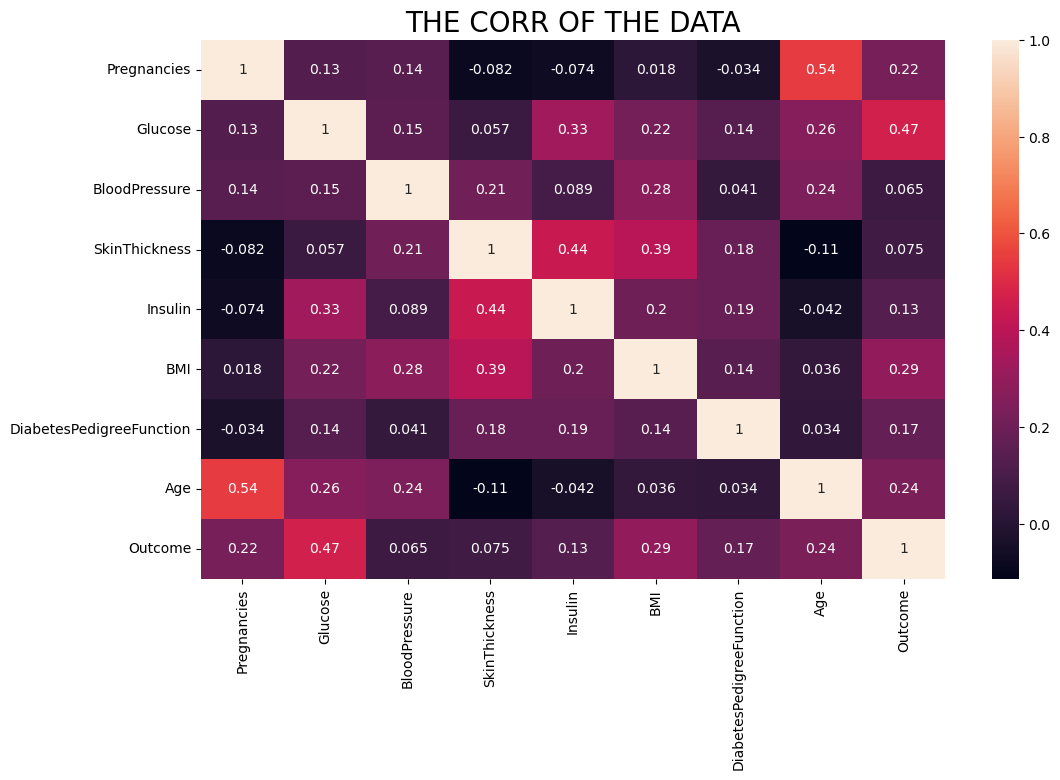

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.title("THE CORR OF THE DATA" , size=20)
plt.show()

### Checking for the Null values and the Duplicate values

In [16]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


* We can see that there are no duplicate values or null values present in the data.

### Distribution of all of the Features of the data

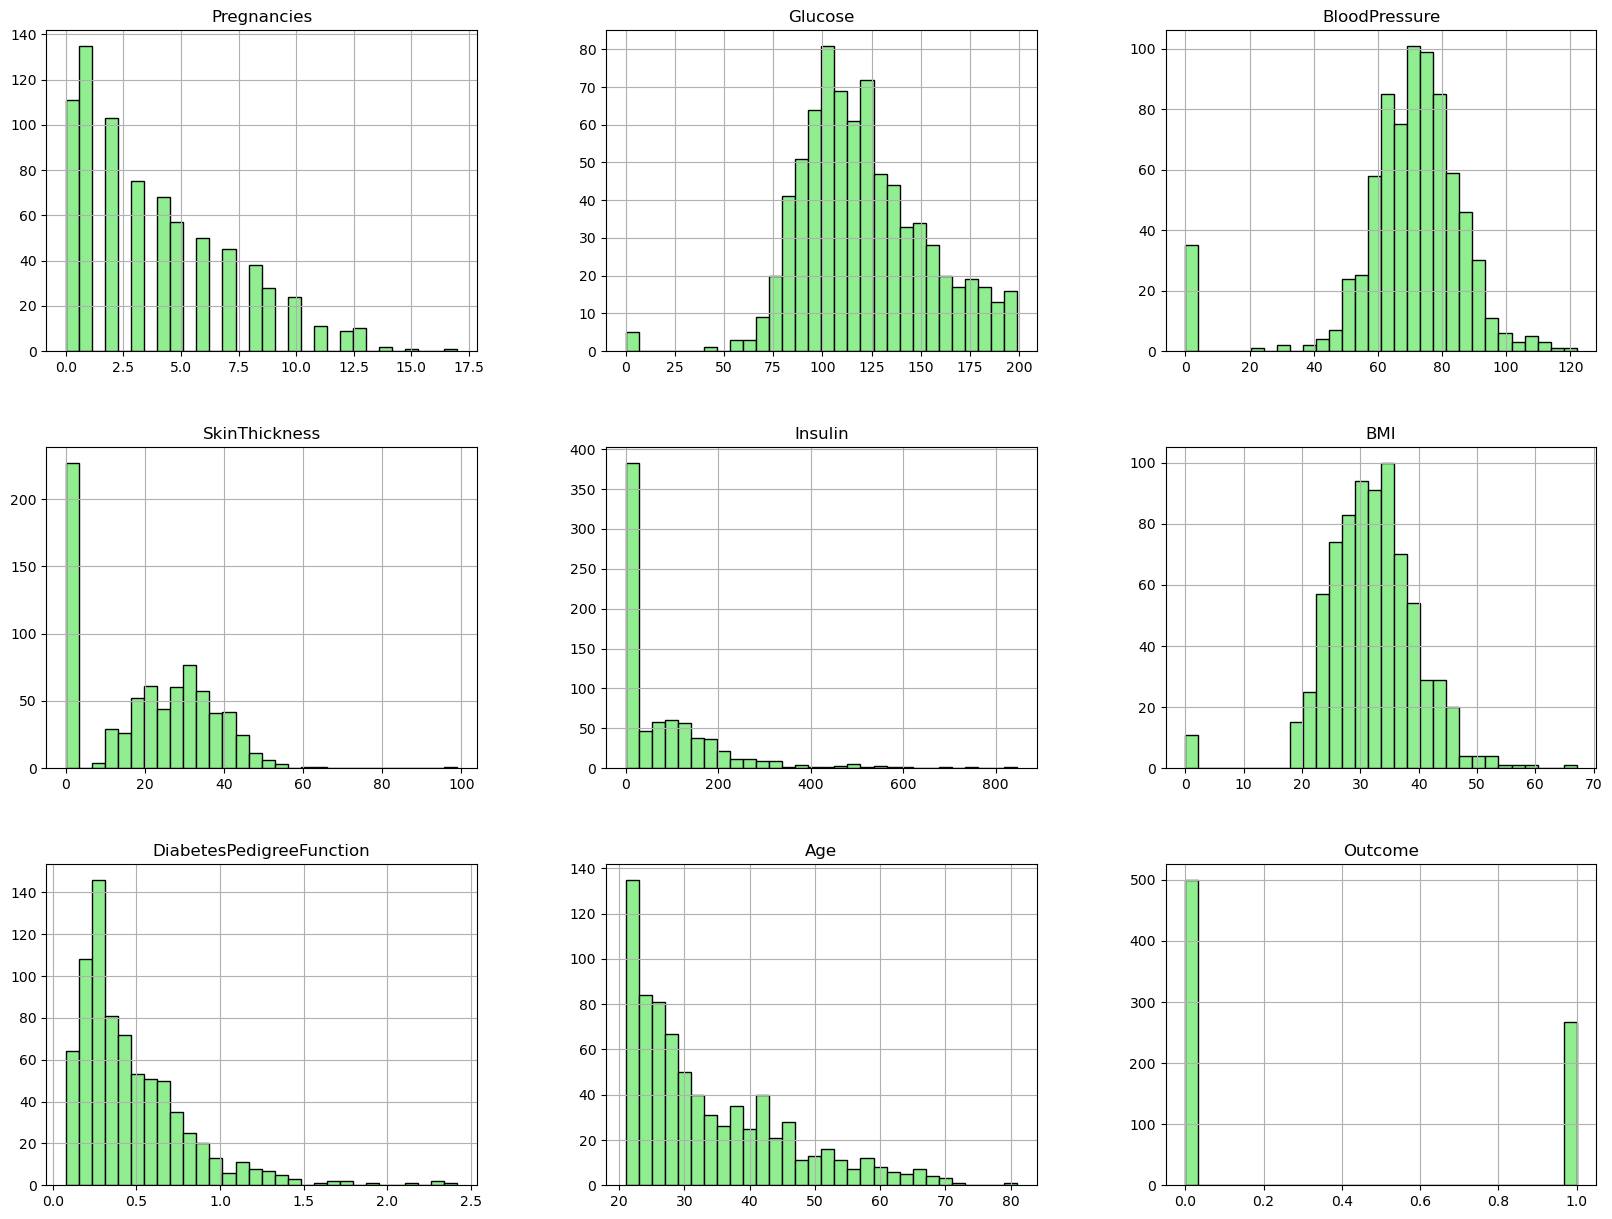

In [29]:
df.hist(bins=30,ec='black',color='lightgreen',figsize=(20,15))
plt.show()

### Process of Training the Model 

In [30]:
from warnings import filterwarnings 
filterwarnings("ignore")

### Deviding the data into dependent and independent variable 

In [31]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Independent Variables

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### Dependent Variable

In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Deviding the data into Training and Testing sets

In [36]:
from sklearn.model_selection import train_test_split

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=30)

In [35]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((537, 8), (231, 8), (537,), (231,))

### Training the Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
classifier = LogisticRegression()

In [39]:
classifier.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [42]:
# This method will provide probability for each value for every outcome

classifier.predict_proba(x_test)

array([[0.88044069, 0.11955931],
       [0.85419425, 0.14580575],
       [0.85230025, 0.14769975],
       [0.36935683, 0.63064317],
       [0.83768642, 0.16231358],
       [0.94785695, 0.05214305],
       [0.29015761, 0.70984239],
       [0.72310716, 0.27689284],
       [0.65662872, 0.34337128],
       [0.95172102, 0.04827898],
       [0.88942901, 0.11057099],
       [0.81638859, 0.18361141],
       [0.87074912, 0.12925088],
       [0.79417153, 0.20582847],
       [0.91056087, 0.08943913],
       [0.91359943, 0.08640057],
       [0.76691669, 0.23308331],
       [0.75795029, 0.24204971],
       [0.19503911, 0.80496089],
       [0.85355934, 0.14644066],
       [0.52950856, 0.47049144],
       [0.12726388, 0.87273612],
       [0.47262392, 0.52737608],
       [0.63092233, 0.36907767],
       [0.02986788, 0.97013212],
       [0.56463117, 0.43536883],
       [0.90945424, 0.09054576],
       [0.95198234, 0.04801766],
       [0.95085448, 0.04914552],
       [0.61032721, 0.38967279],
       [0.

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

### Calculating the Accuracy , Confusion_Matrix , Classification_Report

In [45]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [46]:
confusion_matrix(y_pred,y_test)

array([[139,  27],
       [ 20,  45]], dtype=int64)

In [47]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.87      0.84      0.86       166\n           1       0.62      0.69      0.66        65\n\n    accuracy                           0.80       231\n   macro avg       0.75      0.76      0.76       231\nweighted avg       0.80      0.80      0.80       231\n'

## Accuracy of the Model

In [48]:
accuracy_score(y_pred,y_test)

0.7965367965367965

# Hyperparameter Tuning

### GridSearchCV and RandomizedSearchCV

1. **Hyperparameter Tuning**:
   - Both `GridSearchCV` and `RandomizedSearchCV` are used to find the best hyperparameters for a machine learning model.
   - Hyperparameters are parameters that are not learned during training but are set prior to the training process.



2. **GridSearchCV**:
   - **Method**: Performs an exhaustive search over a specified parameter grid.
   - **Process**: Evaluates all possible combinations of the provided hyperparameter values.
   - **Advantage**: Guarantees finding the optimal set of hyperparameters within the provided grid.
   - **Disadvantage**: Can be computationally expensive and time-consuming, especially with large grids and datasets.



3. **RandomizedSearchCV**:
   - **Method**: Performs a random search over the specified parameter grid.
   - **Process**: Samples a fixed number of parameter settings from the grid.
   - **Advantage**: Faster and more efficient than GridSearchCV, especially with large parameter spaces.
   - **Disadvantage**: May not find the absolute best set of hyperparameters but generally finds a good set in less time.



4. **Usage in Model Optimization**:
   - Both methods are essential for improving model performance by systematically exploring the hyperparameter space and identifying the best combination to optimize model accuracy and generalization.
   - They help in automating the hyperparameter tuning process, making the model development more efficient and effective.



By using `GridSearchCV` and `RandomizedSearchCV`, data scientists can enhance the performance of their machine learning models by finding the optimal hyperparameters more efficiently.


## GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV 

In [51]:
parameters = {'penalty':('l1','l2','elasticnet',None),'C':[1,10,20],
             'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')}

In [52]:
clf = GridSearchCV(LogisticRegression(),param_grid=parameters , cv=5)

In [53]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

### Best Parameters

In [54]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

### Retraining the model with these parameters to increase the accuracy of the model

In [55]:
classifierr = LogisticRegression(penalty='l1',solver='liblinear',C=1)

In [56]:
classifierr.fit(x_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

### Re-Testing

In [57]:
y_pred = classifierr.predict(x_test)

### Confusion Matrix

* We can see that we got better result in confusion matris as compared to previous one.

In [58]:
confusion_matrix(y_pred,y_test)

array([[141,  27],
       [ 18,  45]], dtype=int64)

### Classification Report

In [59]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.89      0.84      0.86       168\n           1       0.62      0.71      0.67        63\n\n    accuracy                           0.81       231\n   macro avg       0.76      0.78      0.76       231\nweighted avg       0.82      0.81      0.81       231\n'

### Accuracy 

* We can see that the accuracy of the model is increased 

In [60]:
accuracy_score(y_pred,y_test)

0.8051948051948052

## RandomizedSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV 

In [80]:
parameters = {'penalty':('l1','l2','elasticnet',None),'C':[1,10,20],
             'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')}

In [81]:
random_clf = RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=5)

### Best Parameters

In [83]:
random_clf.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}

### Retraining the model with these parameters to increase the accuracy of the model

In [82]:
random_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None),
                                        'solver': ('lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga')})

In [84]:
y_pred = random_clf.predict(x_test)

In [85]:
confusion_matrix(y_pred,y_test)

array([[140,  27],
       [ 19,  45]], dtype=int64)

In [86]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86       167\n           1       0.62      0.70      0.66        64\n\n    accuracy                           0.80       231\n   macro avg       0.75      0.77      0.76       231\nweighted avg       0.81      0.80      0.80       231\n'

### Accuracy 

* We can see that the accuracy of the model is increased 

In [87]:
accuracy_score(y_pred,y_test)

0.8008658008658008

## Conclusion
This project demonstrates the application of logistic regression for predicting diabetes in a specific population. The model developed can help in identifying individuals at risk, enabling early diagnosis and intervention. The performance of the model can be evaluated using metrics such as accuracy, precision, recall, and F1-score.



## Future Work
- **Model Improvement**: Explore other machine learning algorithms such as Random Forest, SVM, and Neural Networks to improve prediction accuracy.


- **Feature Engineering**: Investigate additional features and interactions between features to enhance model performance.


- **Cross-validation**: Implement k-fold cross-validation to ensure the model's robustness and generalizability.


- **Real-world Testing**: Validate the model on real-world data from different populations to assess its effectiveness in 
diverse settings.


- **Integration with Healthcare Systems**: Develop tools and applications that integrate the model into healthcare systems for practical use in clinical settings.



#### By extending this work, we can contribute to more effective diabetes prediction and management strategies, ultimately improving patient outcomes.
